# Telecom Churn Case Study(Machine learning -II)

## Problem Statement: 
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. It is more important to retain a customer than to acquire a new customer. So, it is important to retain High_valued customers. For that Telecom companies need to predict the customers with high churn rate so that they can implement different steps to retain them.

Steps Followed:

### Step1. Data Exploration and cleaning:

1.1. Identifying and dealing with meaningful missings in related columns:

Given data is explored to understand and identify the missing values in various columns and the missing values were treated. The categorical columns are identified .The ordinal variables were identified. Highly skewed columns (>90%) were removed. The meaningful missing values in some of the columns with less missing value % were imputed with suitable values.

1.2.Filtering the data into High_valuied customers:

 The Given data is filtered to find the High_valued customers satisfying the condition specified in the problem statement.
  
1.3. Imputing the missing values of columns with low missing value Percentages using KNN Imputer

### Step 2: Data Preparation:

2.1: Deriving Churn Variable
2.2. Remove all columns related to Month 9 
2.3. EDA
    2.3.1. Outlier Analysis
    2.3.2.Checking Correlation
    2.3.3. Relationshoip among important variables 
    2.3.4. Correlation of Churn and other columns
    2.3.5. Plots between  Churn and other columns(To observe their distribution)
    
### Step3: Train_Test_Split   and  

                   ### Transformation ( To deal with Outliers)

### Step4: SMOTE (to deal with data Imbalance)

### Step 5:  Modelling 

      5.1. Interpretable model- (Without PCA)
      
      5.2. With PCA
      5.3. Decision Trees With Lasso and GridsearchCV 
      5.4. Random Forests 
      


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns',226)
pd.set_option('display.max_rows',900)

# Show all outputs 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Exploration and Cleaning

In [2]:
# reading the dataset
telecom = pd.read_csv("telecom_churn_data (1).csv")
telecom.head(40)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
round((telecom.isnull().sum()/len(telecom.index))*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### 1.1. Identifying and dealing with meaningful missings in related columns

In [7]:


telecom['av_rech_amt_data_6'].loc[(telecom['total_rech_data_6'].isnull()&telecom['av_rech_amt_data_6'].isnull())]=0
telecom['av_rech_amt_data_7'].loc[(telecom['total_rech_data_7'].isnull()&telecom['av_rech_amt_data_7'].isnull())]=0
telecom['av_rech_amt_data_8'].loc[(telecom['total_rech_data_8'].isnull()&telecom['av_rech_amt_data_8'].isnull())]=0
telecom['av_rech_amt_data_9'].loc[(telecom['total_rech_data_9'].isnull()&telecom['av_rech_amt_data_9'].isnull())]=0



In [8]:
telecom['total_rech_data_6'].value_counts(normalize=True)

1.0     0.529122
2.0     0.206178
3.0     0.082098
4.0     0.053075
5.0     0.032123
6.0     0.023377
7.0     0.017016
8.0     0.013557
9.0     0.010376
10.0    0.008707
11.0    0.006401
12.0    0.005407
14.0    0.002505
13.0    0.002346
15.0    0.001272
17.0    0.001193
16.0    0.001113
18.0    0.000795
19.0    0.000596
20.0    0.000557
22.0    0.000517
21.0    0.000239
24.0    0.000239
25.0    0.000159
23.0    0.000159
32.0    0.000119
40.0    0.000119
26.0    0.000119
28.0    0.000119
29.0    0.000080
35.0    0.000080
34.0    0.000040
33.0    0.000040
27.0    0.000040
61.0    0.000040
55.0    0.000040
46.0    0.000040
Name: total_rech_data_6, dtype: float64

In [9]:
round((telecom.isnull().sum()/len(telecom.index))*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [10]:
## Identifying and dealing with meaningful missings in 'max_rech_data' column
telecom['max_rech_data_6'].loc[(telecom['total_rech_data_6'].isnull())&(telecom['max_rech_data_6'].isnull())]=0
telecom['max_rech_data_7'].loc[(telecom['total_rech_data_7'].isnull())&(telecom['max_rech_data_7'].isnull())]=0
telecom['max_rech_data_8'].loc[(telecom['total_rech_data_8'].isnull())&(telecom['max_rech_data_8'].isnull())]=0
telecom['max_rech_data_9'].loc[(telecom['total_rech_data_9'].isnull())&(telecom['max_rech_data_9'].isnull())]=0

## Identifying and dealing with meaningful missings in 'count_rech_2g','count_rech_3g' columns
telecom['count_rech_2g_6'].loc[(telecom['total_rech_data_6'].isnull())&(telecom['count_rech_2g_6'].isnull())]=0
telecom['count_rech_2g_7'].loc[(telecom['total_rech_data_7'].isnull())&(telecom['count_rech_2g_7'].isnull())]=0
telecom['count_rech_2g_8'].loc[(telecom['total_rech_data_8'].isnull())&(telecom['count_rech_2g_8'].isnull())]=0
telecom['count_rech_2g_9'].loc[(telecom['total_rech_data_9'].isnull())&(telecom['count_rech_2g_9'].isnull())]=0

telecom['count_rech_3g_6'].loc[(telecom['total_rech_data_6'].isnull())&(telecom['count_rech_3g_6'].isnull())]=0
telecom['count_rech_3g_7'].loc[(telecom['total_rech_data_7'].isnull())&(telecom['count_rech_3g_7'].isnull())]=0
telecom['count_rech_3g_8'].loc[(telecom['total_rech_data_8'].isnull())&(telecom['count_rech_3g_8'].isnull())]=0
telecom['count_rech_3g_9'].loc[(telecom['total_rech_data_9'].isnull())&(telecom['count_rech_3g_9'].isnull())]=0

## Identifying and dealing with meaningful missings in 'arpu_2g','arpu_3g' columns

telecom['arpu_2g_6'].loc[(telecom['total_rech_data_6'].isnull())&(telecom['arpu_2g_6'].isnull())]=0
telecom['arpu_2g_7'].loc[(telecom['total_rech_data_7'].isnull())&(telecom['arpu_2g_7'].isnull())]=0
telecom['arpu_2g_8'].loc[(telecom['total_rech_data_8'].isnull())&(telecom['arpu_2g_8'].isnull())]=0
telecom['arpu_2g_9'].loc[(telecom['total_rech_data_9'].isnull())&(telecom['arpu_2g_9'].isnull())]=0

telecom['arpu_3g_6'].loc[(telecom['total_rech_data_6'].isnull())&(telecom['arpu_3g_6'].isnull())]=0
telecom['arpu_3g_7'].loc[(telecom['total_rech_data_7'].isnull())&(telecom['arpu_3g_7'].isnull())]=0
telecom['arpu_3g_8'].loc[(telecom['total_rech_data_8'].isnull())&(telecom['arpu_3g_8'].isnull())]=0
telecom['arpu_3g_9'].loc[(telecom['total_rech_data_9'].isnull())&(telecom['arpu_3g_9'].isnull())]=0

## Identifying and dealing with meaningful missings in 'date_of_last_rech_data' columns
telecom['date_of_last_rech_data_6'].loc[(telecom['total_rech_data_6'].isnull())&(telecom['date_of_last_rech_data_6'].isnull())]=0
telecom['date_of_last_rech_data_7'].loc[(telecom['total_rech_data_7'].isnull())&(telecom['date_of_last_rech_data_7'].isnull())]=0
telecom['date_of_last_rech_data_8'].loc[(telecom['total_rech_data_8'].isnull())&(telecom['date_of_last_rech_data_8'].isnull())]=0
telecom['date_of_last_rech_data_9'].loc[(telecom['total_rech_data_9'].isnull())&(telecom['date_of_last_rech_data_9'].isnull())]=0

telecom['total_rech_data_6'].loc[telecom['total_rech_data_6'].isnull()]=0
telecom['total_rech_data_7'].loc[telecom['total_rech_data_7'].isnull()]=0
telecom['total_rech_data_8'].loc[telecom['total_rech_data_8'].isnull()]=0
telecom['total_rech_data_9'].loc[telecom['total_rech_data_9'].isnull()]=0

In [11]:
round((telecom.isnull().sum()/len(telecom.index))*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

The columns night_pck_user,fb_user are  with >70% missing values.

In [12]:
telecom['night_pck_user_6'].value_counts(normalize=True)
telecom['night_pck_user_7'].value_counts(normalize=True)
telecom['night_pck_user_8'].value_counts(normalize=True)
telecom['night_pck_user_9'].value_counts(normalize=True)
telecom['fb_user_6'].value_counts(normalize=True)
telecom['fb_user_7'].value_counts(normalize=True)
telecom['fb_user_8'].value_counts(normalize=True)
telecom['fb_user_9'].value_counts(normalize=True)


0.0    0.974914
1.0    0.025086
Name: night_pck_user_6, dtype: float64

0.0    0.976966
1.0    0.023034
Name: night_pck_user_7, dtype: float64

0.0    0.979156
1.0    0.020844
Name: night_pck_user_8, dtype: float64

0.0    0.984029
1.0    0.015971
Name: night_pck_user_9, dtype: float64

1.0    0.914404
0.0    0.085596
Name: fb_user_6, dtype: float64

1.0    0.908764
0.0    0.091236
Name: fb_user_7, dtype: float64

1.0    0.890808
0.0    0.109192
Name: fb_user_8, dtype: float64

1.0    0.860968
0.0    0.139032
Name: fb_user_9, dtype: float64

All these columns are skewed. and can be dropped.

In [13]:
telecom=telecom.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'],axis=1)

In [14]:
telecom.shape

(99999, 218)

In [15]:
telecom_cat = telecom.select_dtypes(include=['object'])
telecom_cat

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,0
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,0,7/25/2014,8/10/2014,0
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,0,0,0,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,0,0,0,0
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,0,0,0,0
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,0,0,0,0
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,0,0,0
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


All the date columns can be dropped.

In [16]:
round(telecom['last_date_of_month_6'].value_counts(normalize=True),4)*100
round(telecom['last_date_of_month_7'].value_counts(normalize=True),4)*100
round(telecom['last_date_of_month_8'].value_counts(normalize=True),4)*100
round(telecom['last_date_of_month_9'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_6'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_7'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_8'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_9'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_data_6'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_data_7'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_data_8'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_data_9'].value_counts(normalize=True),4)*100

6/30/2014    100.0
Name: last_date_of_month_6, dtype: float64

7/31/2014    100.0
Name: last_date_of_month_7, dtype: float64

8/31/2014    100.0
Name: last_date_of_month_8, dtype: float64

9/30/2014    100.0
Name: last_date_of_month_9, dtype: float64

6/30/2014    17.24
6/29/2014    13.13
6/27/2014    11.35
6/28/2014     9.65
6/26/2014     5.62
6/25/2014     4.98
6/17/2014     4.21
6/24/2014     4.20
6/14/2014     3.91
6/21/2014     3.81
6/23/2014     2.96
6/18/2014     2.79
6/12/2014     2.55
6/22/2014     2.38
6/13/2014     2.18
6/19/2014     2.04
6/20/2014     1.83
6/16/2014     1.14
6/15/2014     0.89
6/11/2014     0.59
6/8/2014      0.53
6/5/2014      0.33
6/7/2014      0.33
6/10/2014     0.29
6/3/2014      0.24
6/1/2014      0.22
6/9/2014      0.20
6/6/2014      0.18
6/4/2014      0.13
6/2/2014      0.11
Name: date_of_last_rech_6, dtype: float64

7/31/2014    17.60
7/30/2014    14.11
7/25/2014     9.57
7/29/2014     9.21
7/28/2014     7.64
7/27/2014     6.02
7/26/2014     5.48
7/24/2014     4.07
7/19/2014     3.11
7/22/2014     3.02
7/20/2014     2.94
7/17/2014     2.79
7/16/2014     2.50
7/23/2014     2.34
7/21/2014     1.67
7/15/2014     1.59
7/18/2014     1.30
7/10/2014     0.87
7/9/2014      0.84
7/12/2014     0.75
7/14/2014     0.46
7/11/2014     0.42
7/13/2014     0.33
7/6/2014      0.32
7/4/2014      0.26
7/8/2014      0.20
7/3/2014      0.16
7/7/2014      0.16
7/5/2014      0.13
7/1/2014      0.08
7/2/2014      0.07
Name: date_of_last_rech_7, dtype: float64

8/31/2014    15.26
8/30/2014    12.15
8/29/2014    10.44
8/28/2014    10.19
8/26/2014     9.65
8/24/2014     8.01
8/25/2014     7.94
8/27/2014     5.90
8/22/2014     2.09
8/20/2014     2.06
8/23/2014     1.87
8/19/2014     1.65
8/21/2014     1.40
8/18/2014     1.07
8/9/2014      1.02
8/5/2014      0.98
8/14/2014     0.92
8/15/2014     0.84
8/16/2014     0.78
8/17/2014     0.76
8/12/2014     0.74
8/13/2014     0.73
8/8/2014      0.70
8/6/2014      0.64
8/11/2014     0.58
8/7/2014      0.46
8/10/2014     0.37
8/1/2014      0.26
8/2/2014      0.21
8/4/2014      0.18
8/3/2014      0.13
Name: date_of_last_rech_8, dtype: float64

9/29/2014    23.75
9/30/2014    22.80
9/28/2014    11.13
9/27/2014     6.80
9/26/2014     6.60
9/25/2014     5.90
9/24/2014     3.39
9/21/2014     3.03
9/20/2014     2.71
9/23/2014     2.56
9/22/2014     1.70
9/19/2014     1.16
9/16/2014     0.93
9/17/2014     0.79
9/18/2014     0.69
9/14/2014     0.64
9/11/2014     0.58
9/15/2014     0.56
9/10/2014     0.51
9/12/2014     0.47
9/13/2014     0.46
9/9/2014      0.46
9/6/2014      0.46
9/2/2014      0.45
9/3/2014      0.35
9/5/2014      0.31
9/8/2014      0.27
9/4/2014      0.21
9/7/2014      0.21
9/1/2014      0.14
Name: date_of_last_rech_9, dtype: float64

0            74.85
6/30/2014     1.89
6/29/2014     1.65
6/28/2014     1.64
6/26/2014     1.38
6/27/2014     1.33
6/25/2014     1.11
6/24/2014     1.07
6/22/2014     0.90
6/23/2014     0.89
6/21/2014     0.86
6/17/2014     0.86
6/19/2014     0.81
6/20/2014     0.78
6/18/2014     0.77
6/14/2014     0.74
6/16/2014     0.73
6/12/2014     0.66
6/15/2014     0.66
6/13/2014     0.63
6/11/2014     0.63
6/10/2014     0.63
6/9/2014      0.61
6/6/2014      0.59
6/5/2014      0.58
6/7/2014      0.52
6/8/2014      0.51
6/3/2014      0.50
6/4/2014      0.46
6/2/2014      0.42
6/1/2014      0.33
Name: date_of_last_rech_data_6, dtype: float64

0            74.43
7/31/2014     1.81
7/29/2014     1.72
7/30/2014     1.67
7/28/2014     1.58
7/26/2014     1.24
7/27/2014     1.21
7/25/2014     1.00
7/24/2014     0.88
7/23/2014     0.84
7/22/2014     0.83
7/21/2014     0.81
7/14/2014     0.77
7/19/2014     0.76
7/18/2014     0.75
7/17/2014     0.70
7/20/2014     0.69
7/16/2014     0.69
7/7/2014      0.66
7/12/2014     0.66
7/13/2014     0.64
7/9/2014      0.64
7/10/2014     0.63
7/15/2014     0.61
7/8/2014      0.58
7/11/2014     0.57
7/5/2014      0.55
7/4/2014      0.50
7/6/2014      0.50
7/3/2014      0.40
7/1/2014      0.34
7/2/2014      0.34
Name: date_of_last_rech_data_7, dtype: float64

0            73.66
8/31/2014     2.00
8/30/2014     1.87
8/29/2014     1.61
8/28/2014     1.28
8/27/2014     1.20
8/25/2014     1.16
8/26/2014     1.13
8/24/2014     0.98
8/23/2014     0.92
8/19/2014     0.86
8/21/2014     0.77
8/16/2014     0.76
8/15/2014     0.75
8/20/2014     0.75
8/14/2014     0.74
8/11/2014     0.74
8/22/2014     0.74
8/18/2014     0.72
8/9/2014      0.70
8/10/2014     0.69
8/17/2014     0.66
8/13/2014     0.66
8/8/2014      0.64
8/12/2014     0.61
8/6/2014      0.60
8/7/2014      0.57
8/4/2014      0.54
8/5/2014      0.53
8/3/2014      0.43
8/2/2014      0.41
8/1/2014      0.32
Name: date_of_last_rech_data_8, dtype: float64

0            74.08
9/29/2014     2.33
9/27/2014     1.81
9/30/2014     1.43
9/26/2014     1.32
9/28/2014     1.28
9/25/2014     1.21
9/23/2014     1.11
9/24/2014     1.11
9/22/2014     0.95
9/21/2014     0.86
9/20/2014     0.83
9/18/2014     0.80
9/15/2014     0.78
9/16/2014     0.77
9/19/2014     0.76
9/13/2014     0.73
9/17/2014     0.73
9/9/2014      0.68
9/12/2014     0.66
9/6/2014      0.65
9/14/2014     0.64
9/10/2014     0.61
9/11/2014     0.60
9/8/2014      0.59
9/5/2014      0.57
9/7/2014      0.48
9/3/2014      0.46
9/4/2014      0.45
9/2/2014      0.41
9/1/2014      0.33
Name: date_of_last_rech_data_9, dtype: float64

In [17]:
telecom=telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                      'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1)

In [18]:
telecom.shape

(99999, 210)

In [19]:
telecom_cat = telecom.select_dtypes(include=['object'])
telecom_cat

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014
...,...,...,...,...
99994,6/3/2014,7/20/2014,8/26/2014,9/25/2014
99995,6/17/2014,7/17/2014,8/24/2014,9/26/2014
99996,6/13/2014,7/26/2014,NaN,9/2/2014
99997,6/17/2014,7/19/2014,8/20/2014,9/17/2014


A non-null value in these columns indicates that the recharge has been done in the respective month and a null value indicates no recharge has been done.
Hence we can convert non-null values to '1' and null values to '0'.


In [20]:
# Converting non_null values in date_of_last_rech columns to 1 and null values to 0

telecom['date_of_last_rech_6'].loc[~telecom['date_of_last_rech_6'].isnull()] = 1  # not nan
telecom['date_of_last_rech_7'].loc[~telecom['date_of_last_rech_7'].isnull()] = 1 
telecom['date_of_last_rech_8'].loc[~telecom['date_of_last_rech_8'].isnull()] = 1
telecom['date_of_last_rech_9'].loc[~telecom['date_of_last_rech_9'].isnull()] = 1
telecom['date_of_last_rech_6'].loc[telecom['date_of_last_rech_6'].isnull()] = 0  # nan
telecom['date_of_last_rech_7'].loc[telecom['date_of_last_rech_7'].isnull()] = 0
telecom['date_of_last_rech_8'].loc[telecom['date_of_last_rech_8'].isnull()] = 0
telecom['date_of_last_rech_9'].loc[telecom['date_of_last_rech_9'].isnull()] = 0


Circle_id is not useful in the prediction.It can be removed.

In [21]:
telecom=telecom.drop(['circle_id'],axis=1)
telecom.shape

(99999, 209)

In [22]:
round(telecom['date_of_last_rech_6'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_7'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_8'].value_counts(normalize=True),4)*100
round(telecom['date_of_last_rech_9'].value_counts(normalize=True),4)*100

1    98.39
0     1.61
Name: date_of_last_rech_6, dtype: float64

1    98.23
0     1.77
Name: date_of_last_rech_7, dtype: float64

1    96.38
0     3.62
Name: date_of_last_rech_8, dtype: float64

1    95.24
0     4.76
Name: date_of_last_rech_9, dtype: float64

All these 'date_of_last_rech' columns are totally skewed all have a single value. they also can be dropped.

In [23]:
telecom=telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis=1)

### 1.2. Fitering the data to Identify High value customers

In [24]:
# Deriving a new feature "avg_rech_amt_av67" 
telecom['total_rech_amt_data_6']=(telecom['av_rech_amt_data_6']*telecom['total_rech_data_6'])
telecom['total_rech_amt_data_7']=(telecom['av_rech_amt_data_7']*telecom['total_rech_data_7'])
telecom['avg_rech_amt_av67']= (telecom['total_rech_amt_6']+telecom['total_rech_amt_7']+telecom['total_rech_amt_data_6']+telecom['total_rech_amt_data_7'])/4

telecom

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_av67
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,279.50
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86

In [25]:
# deriving another new feature '70_percentile'
avg=telecom['avg_rech_amt_av67']
telecom['70_percentile']=np.percentile(avg,70,axis=0)
telecom['70_percentile']

0        239.0
1        239.0
2        239.0
3        239.0
4        239.0
         ...  
99994    239.0
99995    239.0
99996    239.0
99997    239.0
99998    239.0
Name: 70_percentile, Length: 99999, dtype: float64

In [26]:
telecom_hvc=telecom[telecom['avg_rech_amt_av67']>=telecom['70_percentile']]

In [27]:
telecom_hvc

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_av67,70_percentile
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,279.50,239.0
7,7000701601,0.0,0.0,0.0,10

### 1.3. Imputing the missing values of columns with low missing value Percentages (Using KNN Imputer)

In [28]:
from sklearn.impute import KNNImputer

In [29]:
imputer=KNNImputer(n_neighbors=5)
telecom_knn=pd.DataFrame(imputer.fit_transform(telecom_hvc))
telecom_knn.columns=telecom_hvc.columns
telecom_knn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_av67,70_percentile
0,7.000843e+09,0.0,0.0,0.0,197.385,214.816,213.803,21.100,58.672,54.464,0.00,55.352,129.814,159.208,0.00,130.296,9.722,0.00,0.00,0.0,14.962,0.00,0.00,0.0,51.328,51.708,0.00,51.092,59.32,73.968,0.00,65.760,7.382,15.428,0.00,15.102,0.0,0.0,0.00,0.952,118.044,141.112,0.00,131.968,5.482,2.756,0.00,4.258,26.478,37.12,0.00,20.006,0.00,0.336,0.00,0.000,0.0,0.0,0.0,0.0,31.962,40.214,0.00,24.266,23.508,21.798,0.00,23.438,0.35,12.572,0.00,6.712,0.226,0.0,0.0,0.0,0.00,0.00,0.00,0.00,51.436,50.71,0.16,42.960,68.834,93.59,4.13,85.632,3.604,7.574,1.15,3.112,123.884,151.882,5.44,131.718,3.142,2.398,0.00,0.226,17.964,24.41,0.00,8.162,2.318,5.316,0.00,0.282,0.0,0.0,0.0,0.0,23.426,32.126,0.00,8.670,0.00,0.00,5.44,0.00,0.096,0.0,0.0,0.206,0.042,0.00,0.00,0.000,0.00,0.00,0.00,0.046,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0

In [30]:
round((telecom_knn.isnull().sum()/len(telecom_knn.index))*100,2)

mobile_number            0.0
loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou

The data is clean and we dont have any missing values left. The data can be prepared for modelling now.

## Step 2: Data preparation

Those who have not made any calls (incoming/outgoing) AND have not used mobile internet(2G/3G) even once in the churn phase (month 9) are to be treated as the customers going to churn.

### 2.1. Deriving Churn Variable

In [31]:
telecom_knn['Churn']=np.where((telecom_knn['total_ic_mou_9']==0)&(telecom_knn['total_og_mou_9']==0)
                      & (telecom_knn['vol_2g_mb_9']==0) & (telecom_knn['vol_3g_mb_9']==0),1,0)
    

telecom_knn['Churn']

0        1
1        1
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Name: Churn, Length: 30001, dtype: int32

### 2.2. Remove all columns related to Month 9 
as they should not be used for prediction

In [32]:

telecom_mod=telecom_knn[telecom_knn.columns.drop(list(telecom_knn.filter(regex='9')))]


In [33]:
telecom_mod


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_av67,70_percentile,Churn
0,7.000843e+09,0.0,0.0,0.0,197.385,214.816,213.803,58.672,54.464,0.00,129.814,159.208,0.00,9.722,0.00,0.00,14.962,0.00,0.00,51.328,51.708,0.00,59.32,73.968,0.00,7.382,15.428,0.00,0.00,0.00,0.00,118.044,141.112,0.00,5.482,2.756,0.00,26.478,37.12,0.00,0.00,0.336,0.00,0.0,0.0,0.0,31.962,40.214,0.00,23.508,21.798,0.00,0.35,12.572,0.00,0.226,0.0,0.0,0.00,0.00,0.00,51.436,50.71,0.16,68.834,93.59,4.13,3.604,7.574,1.15,123.884,151.882,5.44,3.142,2.398,0.00,17.964,24.41,0.00,2.318,5.316,0.00,0.0,0.0,0.0,23.426,32.126,0.00,0.00,0.00,5.44,0.096,0.0,0.0,0.042,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,279.50,239.0,1
1,7.000702e+09,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840,54.680,52.29,453.430,567.160,325.91,16.230,33.49,31.64,23.740,12.59,38.06,51.390,31.380,40.28,308.63,447.380,162.28,62.130,55.140,53.23,0.00,0.00,0.00,422.160,533.910,255.79,4.300,23.290,12.01,49.890,31.76,49.14,6.66,20.080,16.68,0.0,0.0,0.0,60.860,75.140,77.84,0.000,0.180,10.01,4.50,0.000,6.50,0.000,0.0,0.0,487.53,609.24,350.16,58.140,32.26,27.31,217.560,221.49,121.19,152.160,101.460,39.53,427.880,355.230,188.04,36.890,11.830,30.39,91.440,126.99,141.33,52.190,34.240,22.21,0.0,0.0,0.0,180.540,173.080,193.94,626.46,558.04,428.74,0.210,0.0,0.0,2.060,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [34]:
#Deriving New features by combining month 6 & 7
col_list = telecom_mod.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()


# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_mod[avg_col_name] = (telecom_mod[col_6]  + telecom_mod[col_7])/ 2

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others',
       'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou',
       'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou',
       'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt',
       'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data',
       'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb',
       'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g', 'total_rech_amt_data'],
      dtype='object')

In [35]:
telecom_mod.shape

(30001, 211)

In [36]:
# Drop original columns from 6 and 7 months as we already have the info in avg columns that are created.
col_to_drop = telecom_mod.filter(regex='_6|_7').columns
telecom_mod.drop(col_to_drop, axis=1, inplace=True)

In [37]:
telecom_mod.shape

(30001, 111)

### 2.3. EDA

In [38]:
telecom_mod['loc_og_t2o_mou'].value_counts(normalize=True)
telecom_mod['std_og_t2o_mou'].value_counts(normalize=True)
telecom_mod['loc_ic_t2o_mou'].value_counts(normalize=True)



0.0    1.0
Name: loc_og_t2o_mou, dtype: float64

0.0    1.0
Name: std_og_t2o_mou, dtype: float64

0.0    1.0
Name: loc_ic_t2o_mou, dtype: float64

The columns 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou' are skewed and may not be helpful in prediction . So they can be dropped.


In [39]:
telecom_mod=telecom_mod.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [40]:
telecom_mod.shape

(30001, 108)

The column 'sep_vbc_3g' belongs to the Month 9 and not to be used in Prediction. The column '70_percentile' is used for filtering out the High valued customers and is no longer useful for prediction.Thus, can be dropped.


In [41]:
telecom_mod=telecom_mod.drop(['sep_vbc_3g','70_percentile'],axis=1)
telecom_mod

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_av67,Churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_t2c_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_t2o_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_arpu_3g_av67,avg_arpu_2g_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_total_rech_amt_data_av67
0,7.000843e+09,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.0,0.00,5.44,0.0,0.00,0.00,2.0,252.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0.0,1.0,0.0,968.0,30.40,0.00,101.20,279.50,1,206.1005,56.568,144.511,4.861,7.481,51.518,66.644,11.405,0.000,129.578,4.119,31.799,0.168,0.0,36.088,22.653,6.461,0.113,0.000,51.073,81.212,5.589,137.883,2.770,21.187,3.817,0.0,27.776,0.000,0.048,0.021,0.000,3.5,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.170,0.0,0.0,1.0,0.0,252.0
1,7.000702e+09,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,0.0,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.0,193.94,428.74,0.0,31.59,15.14,7.0,3638.0,1580.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,592.50,1,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.000,478.035,13.795,40.825,13.370,0.0,68.000,0.090,2.250,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,0.0,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,7.001525e+09,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.0,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.0,0.75,16.54,0.0,0.00,0.00,14.0,120.0,30.0,10.0,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0.0,3.0,0.0,0.0,315.0,21.03,910.65,122.16,348.00,0,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.000,333.135,124.995,11.865,0.000,0.0,136.870,0.000,0.000,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,0.0,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.000,0.5,0.5,0.0,0.0,177.0
3,7.002124e+09,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.0,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.0,101.93,261.04,0.0,0.00,0.00,27.0,718.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0

#### Identification of Categorical variables
The columns set of  'sachet_2g', 'sachet_3g','monthly_2g' and 'monthly_3g' do have an order in the classes and define different packs.Thus They are Ordinal categorical variables. 

In [42]:
round((telecom_mod.isnull().sum()/len(telecom_mod.index))*100,2)

mobile_number                   0.0
arpu_8                          0.0
onnet_mou_8                     0.0
offnet_mou_8                    0.0
roam_ic_mou_8                   0.0
roam_og_mou_8                   0.0
loc_og_t2t_mou_8                0.0
loc_og_t2m_mou_8                0.0
loc_og_t2f_mou_8                0.0
loc_og_t2c_mou_8                0.0
loc_og_mou_8                    0.0
std_og_t2t_mou_8                0.0
std_og_t2m_mou_8                0.0
std_og_t2f_mou_8                0.0
std_og_t2c_mou_8                0.0
std_og_mou_8                    0.0
isd_og_mou_8                    0.0
spl_og_mou_8                    0.0
og_others_8                     0.0
total_og_mou_8                  0.0
loc_ic_t2t_mou_8                0.0
loc_ic_t2m_mou_8                0.0
loc_ic_t2f_mou_8                0.0
loc_ic_mou_8                    0.0
std_ic_t2t_mou_8                0.0
std_ic_t2m_mou_8                0.0
std_ic_t2f_mou_8                0.0
std_ic_t2o_mou_8            

### 2.3.1. Outlier Analysis

<Figure size 1440x1440 with 0 Axes>

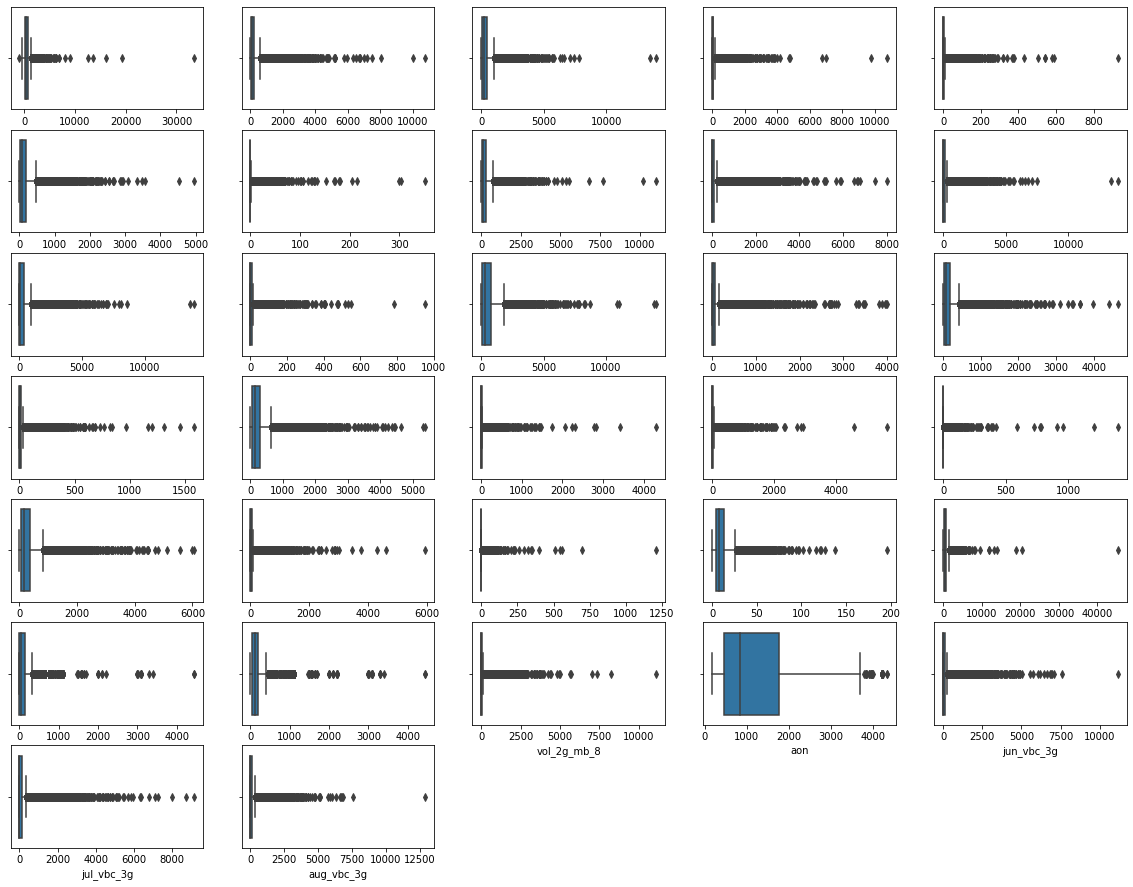

In [43]:
plt.figure(figsize=(20,20))
plt.subplot(9,5,1)
sns.boxplot(telecom_mod['arpu_8'])
plt.subplot(9,5,2)
sns.boxplot(telecom_mod['onnet_mou_8'])
plt.subplot(9,5,3)
sns.boxplot(telecom_mod['offnet_mou_8'])
plt.subplot(9,5,4)
sns.boxplot(telecom_mod['loc_og_t2t_mou_8'])
plt.subplot(9,5,5)
sns.boxplot(telecom_mod['loc_og_t2f_mou_8'])
plt.subplot(9,5,6)
sns.boxplot(telecom_mod['loc_og_t2m_mou_8'])
plt.subplot(9,5,7)
sns.boxplot(telecom_mod['loc_og_t2c_mou_8'])
plt.subplot(9,5,8)
sns.boxplot(telecom_mod['loc_og_mou_8'])
plt.subplot(9,5,9)
sns.boxplot(telecom_mod['std_og_t2t_mou_8'])
plt.subplot(9,5,10)
sns.boxplot(telecom_mod['std_og_t2m_mou_8'])
plt.subplot(9,5,11)
sns.boxplot(telecom_mod['std_og_mou_8'])
plt.subplot(9,5,12)
sns.boxplot(telecom_mod['spl_og_mou_8'])
plt.subplot(9,5,13)
sns.boxplot(telecom_mod['total_og_mou_8'])
plt.subplot(9,5,14)
sns.boxplot(telecom_mod['loc_ic_t2t_mou_8'])
plt.subplot(9,5,15)
sns.boxplot(telecom_mod['loc_ic_t2m_mou_8'])
plt.subplot(9,5,16)
sns.boxplot(telecom_mod['loc_ic_t2f_mou_8'])
plt.subplot(9,5,17)
sns.boxplot(telecom_mod['loc_ic_mou_8'])
plt.subplot(9,5,18)
sns.boxplot(telecom_mod['std_ic_t2t_mou_8'])
plt.subplot(9,5,19)
sns.boxplot(telecom_mod['std_ic_t2m_mou_8'])
plt.subplot(9,5,20)
sns.boxplot(telecom_mod['std_ic_t2f_mou_8'])
plt.subplot(9,5,21)
sns.boxplot(telecom_mod['total_ic_mou_8'])
plt.subplot(9,5,22)
sns.boxplot(telecom_mod['std_ic_mou_8'])
plt.subplot(9,5,23)
sns.boxplot(telecom_mod['ic_others_8'])
plt.subplot(9,5,24)
sns.boxplot(telecom_mod['total_rech_num_8'])
plt.subplot(9,5,25)
sns.boxplot(telecom_mod['total_rech_amt_8'])
plt.subplot(9,5,26)
sns.boxplot(telecom_mod['last_day_rch_amt_8'])
plt.subplot(9,5,27)
sns.boxplot(telecom_mod['max_rech_amt_8'])
plt.subplot(9,5,28)
sns.boxplot(telecom_mod['vol_2g_mb_8'])
plt.subplot(9,5,29)
sns.boxplot(telecom_mod['aon'])

plt.subplot(9,5,30)
sns.boxplot(telecom_mod['jun_vbc_3g'])
plt.subplot(9,5,31)
sns.boxplot(telecom_mod['jul_vbc_3g'])
plt.subplot(9,5,32)
sns.boxplot(telecom_mod['aug_vbc_3g'])







plt.show()

All variables except 'aon' are having outliers and need to be treated. We can use Power Transformer for this purpose.

In [44]:
telecom_mod.head()
telecom_mod.shape

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_av67,Churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_t2c_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_t2o_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_count_rech_2g_av67,avg_count_rech_3g_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_arpu_3g_av67,avg_arpu_2g_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_total_rech_amt_data_av67
0,7.000843e+09,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.0,0.00,5.44,0.0,0.00,0.00,2.0,252.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0.0,1.0,0.0,968.0,30.40,0.00,101.20,279.5,1,206.1005,56.568,144.511,4.861,7.481,51.518,66.644,11.405,0.0,129.578,4.119,31.799,0.168,0.0,36.088,22.653,6.461,0.113,0.000,51.073,81.212,5.589,137.883,2.770,21.187,3.817,0.0,27.776,0.000,0.048,0.021,0.000,3.5,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.17,0.0,0.0,1.0,0.0,252.0
1,7.000702e+09,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,0.0,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.0,193.94,428.74,0.0,31.59,15.14,7.0,3638.0,1580.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,592.5,1,1209.5150,56.260,510.295,24.860,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.370,0.0,68.000,0.090,2.250,0.000,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,0.0,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0
2,7.001525e+09,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.0,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.0,0.75,16.54,0.0,0.00,0.00,14.0,120.0,30.0,10.0,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0.0,3.0,0.0,0.0,315.0,21.03,910.65,122.16,348.0,0,435.4720,382.360,87.645,0.000,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.000,0.0,136.870,0.000,0.000,0.000,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,0.0,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.00,0.5,0.5,0.0,0.0,177.0
3,7.002124e+09,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.0,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.0,101.93,261.04,0.0,0.00,0.00,27.0,718.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0

(30001, 106)

In [45]:
telecom_mod.shape

(30001, 106)

#### 2.3.2.Checking Correlation 

In [46]:
# check the correlation amongst the features, drop the highly correlated ones
cor = telecom_mod.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.70) | (cor < -0.70)].sort_values(ascending=False)

sachet_2g_8                   count_rech_2g_8              0.987161
avg_sachet_2g_av67            avg_count_rech_2g_av67       0.987051
avg_total_rech_amt_av67       avg_arpu_av67                0.976752
total_rech_amt_8              arpu_8                       0.955351
avg_arpu_2g_av67              avg_arpu_3g_av67             0.952267
avg_isd_og_mou_av67           isd_og_mou_8                 0.951367
arpu_2g_8                     arpu_3g_8                    0.937701
avg_total_rech_amt_data_av67  avg_rech_amt_av67            0.925434
avg_count_rech_2g_av67        avg_total_rech_data_av67     0.911180
count_rech_2g_8               total_rech_data_8            0.906664
avg_sachet_2g_av67            avg_total_rech_data_av67     0.905257
sachet_2g_8                   total_rech_data_8            0.900629
avg_total_ic_mou_av67         avg_loc_ic_mou_av67          0.891539
total_ic_mou_8                loc_ic_mou_8                 0.890170
sachet_3g_8                   count_rech_3g_8   

In [47]:
# Dropping the highly correlated features
telecom_mod=telecom_mod.drop(['sachet_2g_8', 'avg_sachet_2g_av67','avg_total_rech_amt_av67','total_rech_amt_8',
                             'avg_arpu_2g_av67','avg_isd_og_mou_av67','arpu_2g_8','avg_total_rech_amt_data_av67',
                             'avg_count_rech_2g_av67','count_rech_2g_8','avg_sachet_2g_av67','sachet_2g_8',
                             'avg_total_ic_mou_av67','total_ic_mou_8','loc_ic_t2m_mou_8','sachet_3g_8','std_og_t2t_mou_8','avg_sachet_3g_av67',
                             'avg_monthly_3g_av67','avg_std_og_t2t_mou_av67','monthly_3g_8','avg_arpu_2g_av67',
                             'std_og_t2m_mou_8','total_og_mou_8','std_ic_mou_8','avg_loc_ic_mou_av67' ,
                             'avg_std_og_t2m_mou_av67','avg_total_og_mou_av67','avg_arpu_3g_av67','avg_loc_og_mou_av67',
                             'avg_av_rech_amt_data_av67','avg_std_ic_mou_av67','arpu_3g_8','avg_loc_og_t2t_mou_av67',
                             'avg_vol_3g_mb_av67','avg_arpu_3g_av67','avg_total_ic_mou_av67','av_rech_amt_data_8',
                             'avg_arpu_2g_av67','avg_loc_og_t2m_mou_av67','avg_loc_ic_t2m_mou_av67',
                             'avg_loc_ic_t2t_mou_av67','loc_og_mou_8','vol_3g_mb_8','avg_std_og_t2f_mou_av67',
                             'avg_loc_ic_t2f_mou_av67','avg_onnet_mou_av67','loc_og_mou_8','arpu_3g_8','avg_loc_og_mou_av67',
                             'std_og_mou_8','total_ic_mou_8','avg_loc_og_t2f_mou_av67','avg_total_rech_amt_av67','avg_std_og_mou_av67',
                             'avg_total_ic_mou_av67','avg_arpu_av67','avg_std_og_mou_av67','avg_vol_3g_mb_av67','total_og_mou_8',
                             'std_og_mou_8','avg_arpu_av67','avg_std_og_mou_av67','avg_total_ic_mou_av67','avg_std_ic_t2f_mou_av67',
                             'avg_ic_others_av67','avg_std_ic_mou_av67','avg_arpu_2g_av67','avg_total_og_mou_av67','avg_max_rech_data_av67',
                              'avg_total_rech_amt_data_av67','avg_loc_ic_mou_av67','avg_offnet_mou_av67','monthly_3g_8',
                              'total_og_mou_8','avg_std_og_t2m_mou_av67','avg_arpu_3g_av67','avg_std_ic_t2m_mou_av67',
                              'avg_total_rech_num_av67','avg_sachet_2g_av67','avg_total_og_mou_av67','avg_count_rech_2g_av67',
                              'arpu_2g_8','avg_count_rech_2g_av67','avg_total_rech_data_av67','last_day_rch_amt_8',
                              'avg_loc_ic_t2m_mou_av67','avg_std_ic_mou_av67'],axis=1)
                             
                             
                             
           

In [48]:
telecom_mod.shape

(30001, 53)

In [49]:
# Convert AON into months
telecom_mod['aon_mon'] = telecom_mod['aon']/30
telecom_mod.drop('aon', axis=1, inplace=True)
telecom_mod['aon_mon'].head()


0    32.266667
1    26.733333
2    10.500000
3    24.000000
4    20.133333
Name: aon_mon, dtype: float64

<Figure size 4320x2880 with 0 Axes>

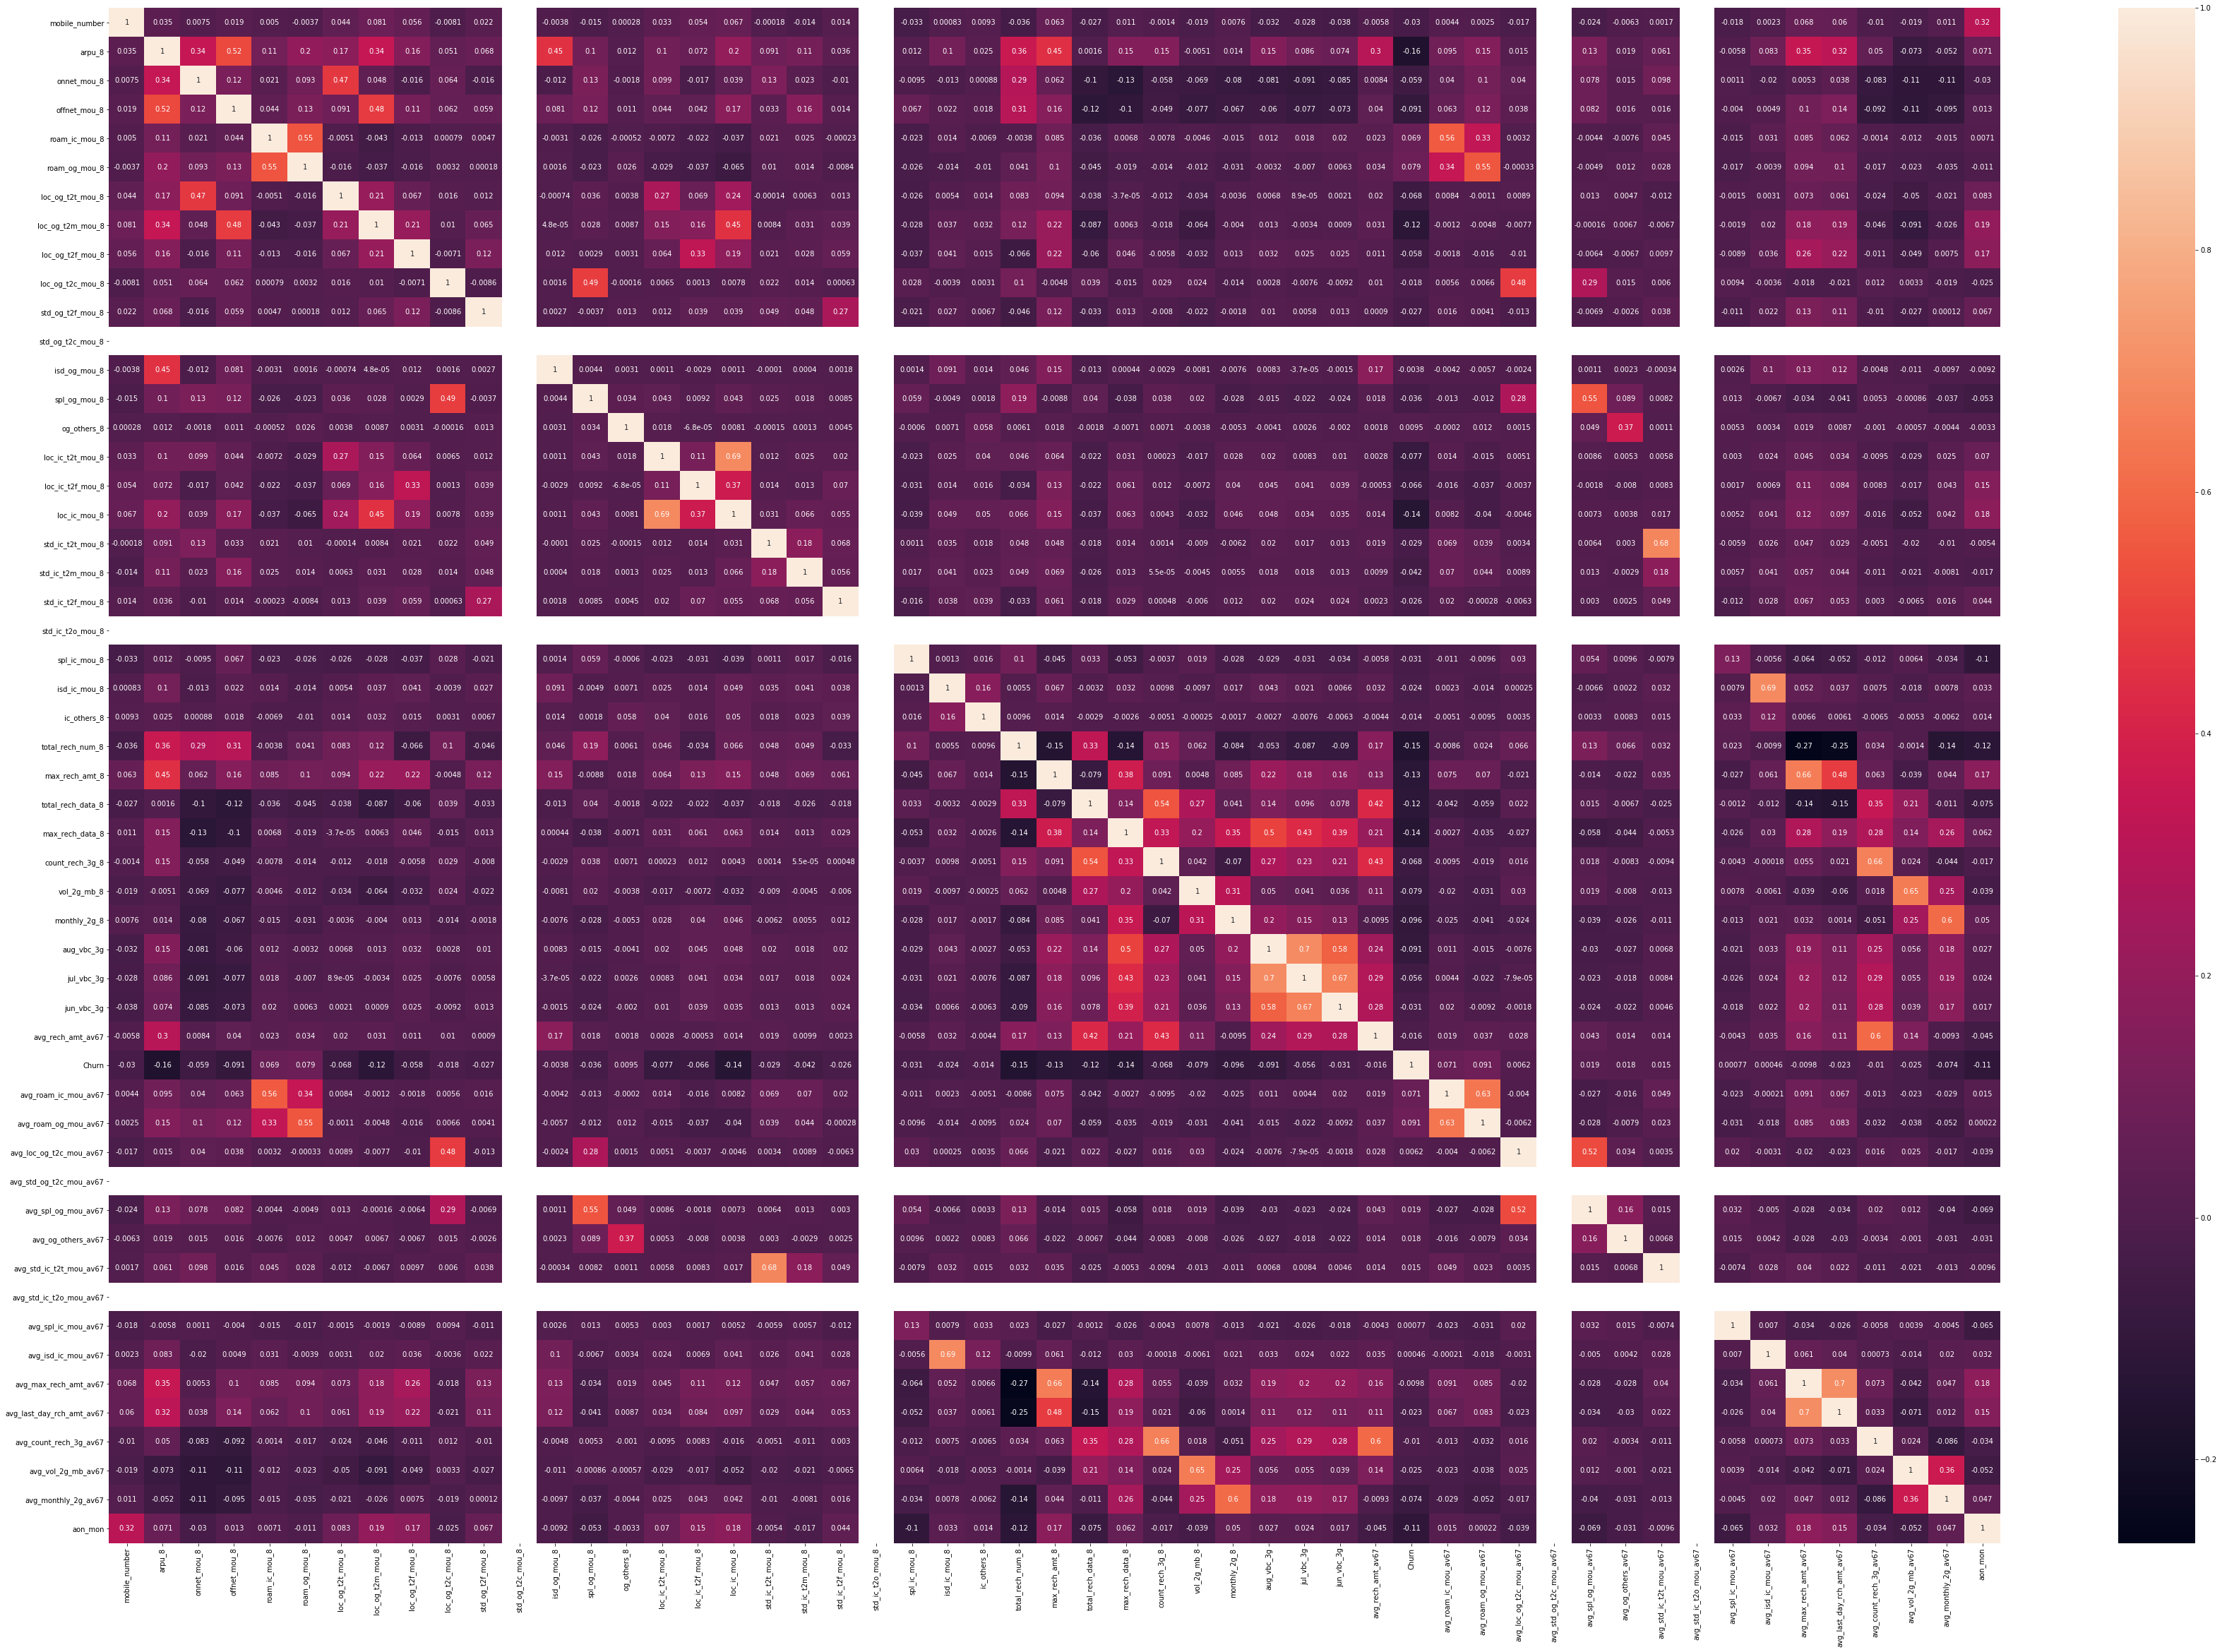

In [50]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,40))        # Size of the figure
sns.heatmap(telecom_mod.corr(),annot = True)
plt.show()

#### 2.3.3. Relationshoip among important variables 

Text(0, 0.5, 'No of Customers')

Text(0.5, 0, 'Tenure in months')

Text(0.5, 1.0, 'Tenure Graph')

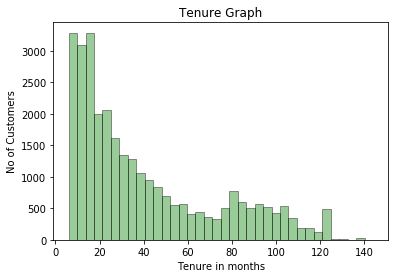

In [51]:
tenure = sns.distplot(telecom_mod['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
tenure.set_ylabel('No of Customers')
tenure.set_xlabel('Tenure in months')
tenure.set_title('Tenure Graph')


In [52]:
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs','5 Yrs and above']
telecom_mod['tenure_range'] = pd.cut(telecom_mod['aon_mon'], tenure_range ,labels=tenure_label)
telecom_mod['tenure_range']


0            2-5 Yrs
1            2-5 Yrs
2        6-12 Months
3            1-2 Yrs
4            1-2 Yrs
            ...     
29996        1-2 Yrs
29997        2-5 Yrs
29998            NaN
29999    6-12 Months
30000        1-2 Yrs
Name: tenure_range, Length: 30001, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

#### 2.3.4. Correlation of Churn and other columns

<Figure size 1440x720 with 0 Axes>

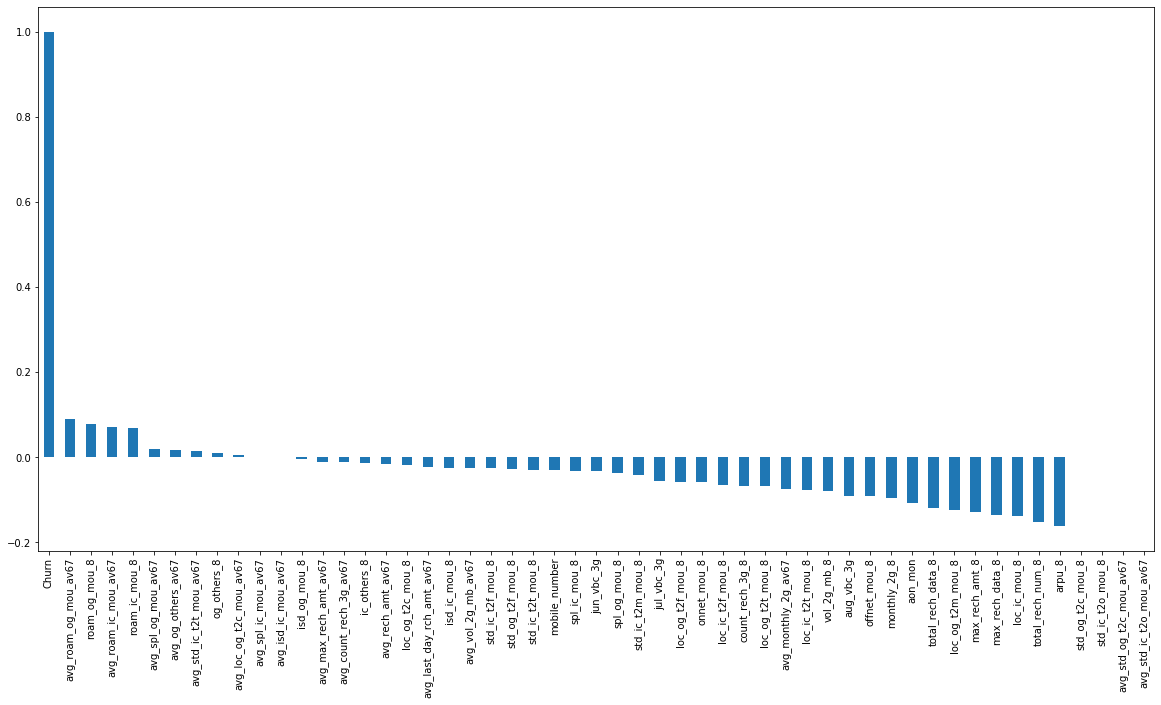

In [53]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
telecom_mod.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


From the above correlation plot,it is observed that the average roaming outgoing calls of 6&7 months and 8th months & avg. roaming incoming calls of 6& 7 and 8th month are having higher positive correlation with Churn variable.
Similarly on the other side, Average Revenue Per User(ARPU8),Total recharge number& Maximum Recharge of data and calls in the month 8,tenure(aon-mon), are having more negative correlation with the Churn variable.

#### 2.3.5. Plots between  Churn and other columns

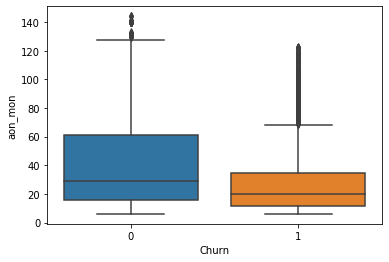

In [54]:
sns.boxplot(x = telecom_mod.Churn, y = telecom_mod.aon_mon)

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Volume based cost')

Text(0.5, 1.0, 'Churn Vs Overall Cost')

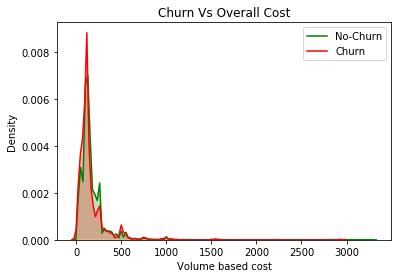

In [55]:
# Churn Vs Overall Cost
ax = sns.kdeplot(telecom_mod.avg_max_rech_amt_av67[(telecom_mod['Churn'] == 0)],
                color="green", shade = True)
ax = sns.kdeplot(telecom_mod.avg_max_rech_amt_av67[(telecom_mod['Churn'] == 1)],
                ax =ax, color="Red", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Overall Cost')

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Volume based cost')

Text(0.5, 1.0, ' Max Recharge Amount (Vs) churn')

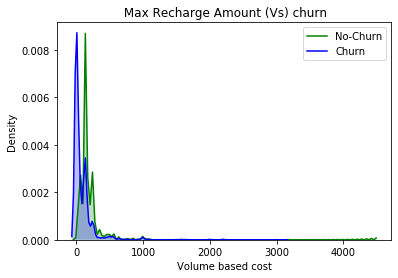

In [56]:
# Plotting Churn vs max recharge amount
ax = sns.kdeplot(telecom_mod.max_rech_amt_8[(telecom_mod['Churn'] == 0)],
                color="Green", shade = True)
ax = sns.kdeplot(telecom_mod.max_rech_amt_8[(telecom_mod['Churn'] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title(' Max Recharge Amount (Vs) churn')

In [57]:
# Creating a copy of telecom_mod for modelling
df=telecom_mod[:].copy()
df=df.drop(['tenure_range','mobile_number'],axis=1)

### Step3: Train_test_Split 

In [58]:
# Putting Feature variables to X and Target variable to y
X=df.drop(['Churn'],axis=1)
y=df['Churn']
df.drop('Churn',axis=1,inplace=True)

##### Transformation

In [59]:
# Transformation of Independent variables (To deal with the Outliers)
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

X=pt.fit_transform(X,y)


In [60]:
# Train_test_split of data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [61]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
(y.value_counts()/len(y))*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

The Total number of Non-Churn is around 92% where the Churn % is very low and around 8%. It indicates the Churn column is skewed. and we need to use Data balancing technique to deal with this.
SMOTE techniques is used here to tackle the Data imbalance.

### Step 4: SMOTE (to deal with data Imbalance)

In [63]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_smote,y_smote = smote.fit_resample(X_train,y_train)

In [64]:
pd.Series(y_smote).value_counts()

1    19309
0    19309
Name: Churn, dtype: int64

The Churn column is balanced now.

## Step 5:  Modelling 

    5.1. Interpretable model- (Without PCA)- Logistic Regression with RFE
    5.2. PCA 


In [65]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score

import statsmodels.api as sm

In [66]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred_lr=lr.predict(X_test)

In [68]:
metrics.accuracy_score(y_test,y_pred_lr)
metrics.recall_score(y_test,y_pred_lr)

0.9335629374513943

0.3893333333333333

In [69]:
# Using RFE for Feature selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_train_pred = logreg.predict(X_train)
accuracy_score(y_train, y_train_pred)


LogisticRegression()

0.9349047619047619

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [71]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

In [72]:
# Run the model with features selected by RFE
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [73]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[8113  138]
 [ 478  272]]
Accuracy on the test dataset: 0.9315631596489279


In [74]:
# lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8251
           1       0.66      0.36      0.47       750

    accuracy                           0.93      9001
   macro avg       0.80      0.67      0.72      9001
weighted avg       0.92      0.93      0.92      9001



### 5.2.  PCA

In [75]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_smote,y_smote = smote.fit_resample(X_train,y_train)

In [76]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
X_train_pca=pca.fit_transform(X_smote)
X_test_pca = pca.transform(X_test)


In [77]:
# Run Logistic Regression again after PCA

lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_smote)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)


LogisticRegression(random_state=42)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))


[[6982 1290]
 [ 151  578]]
Accuracy of the logistic regression model with PCA:  0.839906677035885


In [79]:
col =list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.203461,-0.040252,0.182803,arpu_8
1,0.155482,-0.255413,0.044064,onnet_mou_8
2,0.210117,-0.224372,0.048242,offnet_mou_8
3,-0.186724,-0.213086,0.345798,roam_ic_mou_8
4,-0.183613,-0.224326,0.341572,roam_og_mou_8
5,0.269483,-0.158848,-0.051888,loc_og_t2t_mou_8
6,0.290669,-0.142861,-0.051551,loc_og_t2m_mou_8
7,0.195323,-0.079725,0.032245,loc_og_t2f_mou_8
8,0.057610,-0.086839,-0.116275,loc_og_t2c_mou_8
9,0.105400,-0.084049,0.033803,std_og_t2f_mou_8


Text(0.5, 0, 'number of principal components')

Text(0, 0.5, 'explained variance - cumulative')

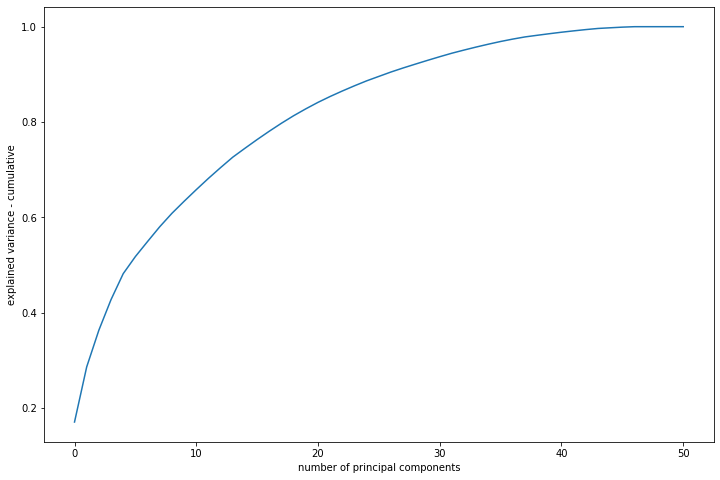

In [80]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()



In [81]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([17.01, 28.58, 36.29, 42.71, 48.15, 51.74, 54.9 , 58.  , 60.82,
       63.34, 65.78, 68.15, 70.41, 72.6 , 74.47, 76.3 , 78.05, 79.73,
       81.31, 82.76, 84.12, 85.36, 86.51, 87.6 , 88.64, 89.57, 90.5 ,
       91.35, 92.15, 92.94, 93.71, 94.45, 95.11, 95.74, 96.34, 96.9 ,
       97.4 , 97.85, 98.19, 98.52, 98.83, 99.11, 99.38, 99.62, 99.76,
       99.89, 99.99, 99.99, 99.99, 99.99, 99.99])

In [82]:
# 27 components will explain>90% of the variance 

In [83]:
# PCA with 12 components
pca_27 = PCA(n_components=27)

df_tr_pca_27 = pca_27.fit_transform(X_train)
print(df_tr_pca_27.shape)

df_test_pca_27 = pca_27.transform(X_test)
print(df_test_pca_27.shape)

(21000, 27)
(9001, 27)


In [84]:
# Run the model with PCA selected 12 variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(random_state=42)
lr_pca1.fit(df_tr_pca_27, y_train)

# Predicted probabilities
y_pred27 = lr_pca1.predict(df_test_pca_27)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred27)

print("Accuracy with 27 PCAs: ",accuracy_score(y_test,y_pred27))
print("Recall with 27 PCAs: ",recall_score(y_test,y_pred27))

LogisticRegression(random_state=42)

Accuracy with 27 PCAs:  0.9334518386845906
Recall with 27 PCAs:  0.35802469135802467


#### So, The Accuracy is improved to 93.345% with 27 PCA components with 90% variance explained.


In [85]:
print(confusion_matrix(y_test,y_pred27))

[[8141  131]
 [ 468  261]]


 The Top-5 attributes which are going to effect the Churn Decision are the following:
        
1.arpu_8

2.onnet_mou_8

3.offnet_mou_8

4.roam_ic_mou_8

5.roam_og_mou_8


### 5.3. Decision Trees With Lasso and GridsearchCV

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_smote,y_smote = smote.fit_resample(X_train,y_train)

In [87]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_smote, y_smote)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_smote)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(38576, 24)
[ 0  3  4  7  8 11 12 16 18 19 21 22 24 25 26 29 30 31 34 39 45 47 49 50]


In [88]:
# feature vector for decision tree
lasso_features = list(df.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'total_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_rech_amt_av67', 'avg_spl_og_mou_av67', 'avg_max_rech_amt_av67', 'avg_count_rech_3g_av67', 'avg_monthly_2g_av67', 'aon_mon']


In [89]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_smote)


DecisionTreeClassifier(max_depth=5)

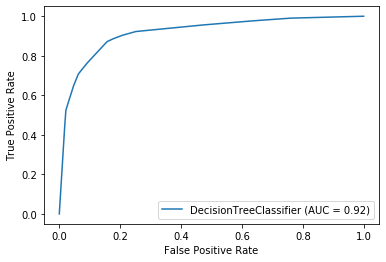

In [90]:
#Plot the ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt1, X_lasso, y_smote, drop_intermediate=False)
plt.show()

In [91]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8272
           1       0.29      0.79      0.42       729

    accuracy                           0.83      9001
   macro avg       0.63      0.81      0.66      9001
weighted avg       0.92      0.83      0.86      9001



#### Tuning the Hyper parameters

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [93]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.045237,0.003825,0.001380,0.000485,1,{'max_depth': 1},0.740539,0.750486,0.745561,0.740765,0.742968,0.744064,0.003688,39,0.753273,0.750786,0.752017,0.738375,0.737144,0.746319,0.007044
1,0.077729,0.001096,0.000981,0.000007,2,{'max_depth': 2},0.810783,0.810758,0.811795,0.815036,0.822553,0.814185,0.004467,38,0.816040,0.815884,0.815625,0.813454,0.811510,0.814503,0.001766
2,0.119401,0.009798,0.001578,0.000474,3,{'max_depth': 3},0.827631,0.827609,0.831627,0.831627,0.839145,0.831527,0.004209,37,0.833182,0.831729,0.832442,0.832831,0.835035,0.833044,0.001106
3,0.159202,0.015062,0.000591,0.000483,4,{'max_depth': 4},0.835018,0.840570,0.842385,0.845885,0.856773,0.844126,0.007234,36,0.847051,0.845857,0.846052,0.847575,0.844950,0.846297,0.000924
4,0.184384,0.012543,0.001396,0.000488,5,{'max_depth': 5},0.843961,0.852236,0.855217,0.854699,0.863901,0.854003,0.006386,35,0.861471,0.858073,0.860050,0.860180,0.858721,0.859699,0.001191


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

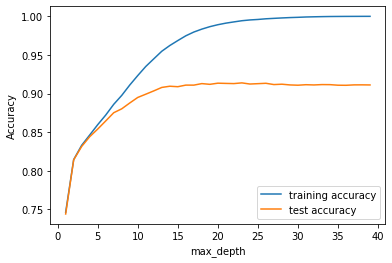

In [94]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Max_depth= 15 seems to be a optimal value as it achieves the best Cross validation score on Test Set.

In [95]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [96]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.479441,0.014743,0.001992,0.000008,5,{'min_samples_leaf': 5},0.871825,0.912638,0.910305,0.912638,0.914582,0.904397,0.016343,1,0.965846,0.962185,0.961926,0.962315,0.962574,0.962969,0.001453
1,0.409856,0.008819,0.001791,0.000397,25,{'min_samples_leaf': 25},0.865604,0.893065,0.890992,0.892547,0.900972,0.888636,0.012026,2,0.918957,0.915622,0.912705,0.911377,0.911442,0.914020,0.002909
2,0.361004,0.008493,0.001794,0.000398,45,{'min_samples_leaf': 45},0.857180,0.883085,0.882048,0.883603,0.889695,0.879122,0.011292,3,0.901717,0.897962,0.897281,0.896698,0.893620,0.897456,0.002598
3,0.343302,0.004617,0.001998,0.000019,65,{'min_samples_leaf': 65},0.856661,0.878548,0.875567,0.873493,0.880752,0.873004,0.008540,4,0.888496,0.888954,0.885227,0.884417,0.884385,0.886296,0.002011
4,0.328525,0.004629,0.001810,0.000385,85,{'min_samples_leaf': 85},0.851348,0.869864,0.869345,0.866623,0.878548,0.867146,0.008855,5,0.884543,0.879168,0.879103,0.878973,0.878844,0.880126,0.002211


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_sample_leaf')

Text(0, 0.5, 'Accuracy')

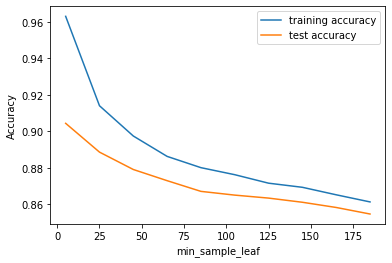

In [97]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Min_sample_leaf is around 5 from the above graph.

In [98]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.479441,0.014743,0.001992,0.000008,5,{'min_samples_leaf': 5},0.871825,0.912638,0.910305,0.912638,0.914582,0.904397,0.016343,1,0.965846,0.962185,0.961926,0.962315,0.962574,0.962969,0.001453
1,0.409856,0.008819,0.001791,0.000397,25,{'min_samples_leaf': 25},0.865604,0.893065,0.890992,0.892547,0.900972,0.888636,0.012026,2,0.918957,0.915622,0.912705,0.911377,0.911442,0.914020,0.002909
2,0.361004,0.008493,0.001794,0.000398,45,{'min_samples_leaf': 45},0.857180,0.883085,0.882048,0.883603,0.889695,0.879122,0.011292,3,0.901717,0.897962,0.897281,0.896698,0.893620,0.897456,0.002598
3,0.343302,0.004617,0.001998,0.000019,65,{'min_samples_leaf': 65},0.856661,0.878548,0.875567,0.873493,0.880752,0.873004,0.008540,4,0.888496,0.888954,0.885227,0.884417,0.884385,0.886296,0.002011
4,0.328525,0.004629,0.001810,0.000385,85,{'min_samples_leaf': 85},0.851348,0.869864,0.869345,0.866623,0.878548,0.867146,0.008855,5,0.884543,0.879168,0.879103,0.878973,0.878844,0.880126,0.002211


In [99]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [103]:
#Create the parameter grid 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(2, 10, 5),
    'min_samples_split': range(2, 10, 5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   49.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 20, 5),
                         'min_samples_leaf': range(2, 10, 5),
                         'min_samples_split': range(2, 10, 5)},
             verbose=1)

In [104]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107030,0.009127,0.001193,0.000402,entropy,2,2,2,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.810005,0.810499,0.808555,0.815813,0.822553,0.813485,0.005157,29
1,0.098858,0.001164,0.001191,0.000395,entropy,2,2,7,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.810005,0.810499,0.808555,0.815813,0.822553,0.813485,0.005157,29
2,0.100644,0.002101,0.001181,0.000407,entropy,2,7,2,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.810005,0.810499,0.808555,0.815813,0.822553,0.813485,0.005157,29
3,0.107654,0.006562,0.000988,0.000010,entropy,2,7,7,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.810005,0.810499,0.808555,0.815813,0.822553,0.813485,0.005157,29
4,0.320530,0.009191,0.001585,0.000494,entropy,7,2,2,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.858346,0.861568,0.873234,0.875308,0.879974,0.869686,0.008301,21
5,0.316338,0.002866,0.000981,0.000012,entropy,7,2,7,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.857957,0.861568,0.872975,0.875567,0.879585,0.869531,0.008327,23
6,0.315127,0.002479,0.001806,0.000409,entropy,7,7,2,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.859253,0.861050,0.873623,0.874401,0.879715,0.869608,0.008021,22
7,0.315149,0.003905,0.000793,0.000746,entropy,7,7,7,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.858735,0.861050,0.873623,0.874401,0.879715,0.869505,0.008157,24
8,0.467432,0.001785,0.001579,0.000494,entropy,12,2,2,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.871047,0.896954,0.906416,0.903953,0.910564,0.897787,0.014082,13
9,0.467826,0.003810,0.001787,0.000410,entropy,12,2,7,"{'criterion': 'entropy', 'max_depth': 12, 'min...",0.871954,0.896047,0.905120,0.904731,0.911601,0.897891,0.013879,12


Best Accuracy 0.9092449084428514


In [105]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=2, min_samples_split=7)


In [106]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_smote)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [107]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

# confusion_Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)
 

Accuracy Score for Decision Tree Final Model : 0.8263526274858349
[[6853 1419]
 [ 154  575]]


Conclusion from the above Decision Tree model:
1. 82.63% accuracy on the test dataset
2. lots of false positives in the confusion matrix

### 5.4.Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(X_lasso,y_smote)



RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [109]:
rf.oob_score_

0.8374118622978017

In [110]:
# Make predictions
prediction_test = rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.8526830352183091


In [111]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8272
           1       0.33      0.77      0.46       729

    accuracy                           0.85      9001
   macro avg       0.65      0.81      0.69      9001
weighted avg       0.92      0.85      0.88      9001



In [112]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, prediction_test)
print(conf)

[[7117 1155]
 [ 171  558]]


In [113]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [114]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [115]:
%%time
grid_search.fit(X_lasso, y_smote)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.0min finished


Wall time: 3min 9s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [116]:
grid_search.best_score_

0.9420624222314393

In [117]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=5,
                       oob_score=True, random_state=100)

In [118]:
# fit the grid search with the data
grid_search.fit(X_lasso, y_smote)
# optimal accuracy score and hyperparameters
print('Accuracy is',grid_search.best_score_,'using',grid_search.best_params_)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.1min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

Accuracy is 0.9420624222314393 using {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}


In [119]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=20,
                                  min_samples_leaf=5, 
                                  min_samples_split=10,
                                  n_estimators=100 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

RandomForestClassifier(max_depth=20, max_features=15, max_leaf_nodes=30,
                       min_samples_leaf=5, min_samples_split=10, n_jobs=-1,
                       oob_score=True, random_state=50)

In [120]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5493
           1       0.72      0.43      0.54       508

    accuracy                           0.94      6001
   macro avg       0.84      0.71      0.75      6001
weighted avg       0.93      0.94      0.93      6001

[[5410   83]
 [ 291  217]]


In [121]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))


Accuracy Score for Random Forest Final Model : 0.9376770538243626


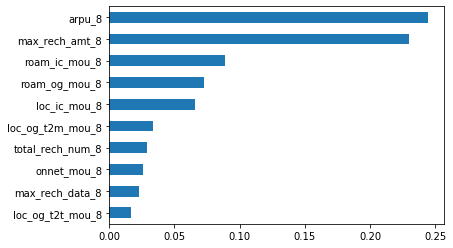

In [122]:
# list of important features
X = df
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Conclusions: (Random Forest)
1. Average Revenue per User(ARPU) of the 8th month& Maximum Recharge amount of month 8 are the top predictors of Churn .
2. Roaming (Incoming& Outgoing ) of month 8 and Local incoming call usage are the next important predictors.
3. Accuracy score is found to be 93.77%
4. F1_score,Precision and recall for class 0 are very good where as for the Class 1 they are moderate,i.e., Class 0 is predicted with higher precision than Class 1. this is beacause of the high imabalance existing in the Churn variable.

#### Final Conclusion:(From All the executed models):

1. ARPU, Recharge of calls and Data, and roaming(incoming& Outgoing) of  8th month are important predictors of Churn.
2. Customers who are having Tenure >30 months are more likely to stay with the telecom company and are less likely to Churn.
3. The Onnet and Offnet calls of 8th month,and local and STD calls are also important prtedictors.
4. Over all Ramdom Forest is producing best prediction results, which is followed by simple Logistic Regression model,giving good results for precision, Recall ,F1 score and Accuracy.


  

### Business Recommendations:

1. As the local & STD calls and data recharges in 8th month are important predictors , company need to observe any sudden changes in this pattern and should predict Churn. 
2. Up-to-date information about the recharges is to be maintained in a database .
3. Attractive offers on data/ roaming/ calls need to be communicated to the customers who are likely to churn.
4. As the customers who stayed with the company from long time are less likely to churn  and their distribution is very less as seen from the plot,
   More concentration should be on the newly joined customers ,who are very large in number. 
5. Newly joined customers are to be provided with some perks so that they stick to the network initially, which will improve the revenue in a greater extent.
6. The roaming connectivity is to be maintained properly as it plays important role in prediction.
7. As the calls and data play key role, recharge facility need to be made easy by the use of mobile apps which are user friendly.
8. On a whole, A good network area and fast Internet will retain customers more.